In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib
sns.set_style(style='white')
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
dataset = pd.read_csv('./metastable-failures-dataset01.csv')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 56 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Time                                   2340 non-null   object 
 1   goodput                                2340 non-null   int64  
 2   incoming_throughput                    2340 non-null   int64  
 3   batch_size                             2340 non-null   int64  
 4   interval                               2340 non-null   int64  
 5   timeout                                2340 non-null   int64  
 6   total_retries                          2340 non-null   int64  
 7   total_retries_rate                     2340 non-null   float64
 8   completed_retries                      2340 non-null   int64  
 9   completed_retries_rate                 2340 non-null   float64
 10  average_latency_of_finished_requests   1293 non-null   float64
 11  post

In [5]:
dataset.head()

,Time,goodput,incoming_throughput,batch_size,interval,timeout,total_retries,total_retries_rate,completed_retries,completed_retries_rate,...,jvm_threads_current_server3,jvm_threads_blocked_server1,jvm_threads_blocked_server2,jvm_threads_blocked_server3,jvm_heap_usage_server1,jvm_heap_usage_server2,jvm_heap_usage_server3,jvm_gc_usage_rate_20_server1,jvm_gc_usage_rate_20_server2,jvm_gc_usage_rate_20_server3
0,2023-02-05 21:33:54,0,97054,200000,300,600,0,0.0,0,0.0,...,20,0,0,0,95281528,62744072,62613672,0.0000,0.0,0.0
1,2023-02-05 21:33:55,46443,231624,200000,300,600,0,0.0,0,0.0,...,20,0,0,0,95281528,62744072,62613672,0.0000,0.0,0.0
2,2023-02-05 21:33:56,225623,405914,200000,300,600,0,0.0,0,0.0,...,20,0,0,0,33610672,79521288,62613672,0.0513,0.0,0.0
3,2023-02-05 21:33:57,360927,541219,200000,300,600,0,0.0,0,0.0,...,20,0,0,0,33610672,79521288,79390888,0.0513,0.0,0.0
4,2023-02-05 21:33:58,496232,634978,200000,300,600,0,0.0,0,0.0,...,20,0,0,0,50387888,79521288,79390888,0.0513,0.0,0.0


In [6]:
dataset.describe()

,goodput,incoming_throughput,batch_size,interval,timeout,total_retries,total_retries_rate,completed_retries,completed_retries_rate,average_latency_of_finished_requests,...,jvm_threads_current_server3,jvm_threads_blocked_server1,jvm_threads_blocked_server2,jvm_threads_blocked_server3,jvm_heap_usage_server1,jvm_heap_usage_server2,jvm_heap_usage_server3,jvm_gc_usage_rate_20_server1,jvm_gc_usage_rate_20_server2,jvm_gc_usage_rate_20_server3
count,2.340000e+03,2.340000e+03,2340.000000,2340.0,2340.0,2340.000000,2340.000000,2340.000000,2340.000000,1293.000000,...,2340.000000,2340.000000,2340.000000,2340.000000,2.340000e+03,2.340000e+03,2.340000e+03,2340.000000,2340.000000,2340.000000
mean,2.393912e+05,1.166486e+06,164756.410256,300.0,600.0,3733.467949,3.285983,41.146154,0.033017,0.330407,...,20.237179,0.001282,360.015812,0.002137,1.038327e+08,6.890102e+08,1.386703e+08,0.039080,0.070071,0.011929
std,3.250419e+05,8.340666e+05,84925.743169,0.0,0.0,3126.256645,3.214319,24.967204,0.123877,0.273497,...,0.586059,0.046217,437.339837,0.046185,4.301881e+07,5.070693e+08,6.712366e+07,0.026294,0.087082,0.022652
min,0.000000e+00,3.235600e+04,10000.000000,300.0,600.0,0.000000,0.000000,0.000000,0.000000,0.094500,...,19.000000,0.000000,0.000000,0.000000,3.169978e+07,2.986851e+07,2.859999e+07,0.000000,0.000000,0.000000
25%,0.000000e+00,6.349780e+05,100000.000000,300.0,600.0,33.000000,0.000000,28.000000,0.000000,0.136000,...,20.000000,0.000000,0.000000,0.000000,6.796160e+07,1.552710e+08,8.023012e+07,0.000000,0.000000,0.000000
50%,3.466700e+04,9.763870e+05,200000.000000,300.0,600.0,3615.000000,5.560000,41.000000,0.000000,0.308000,...,20.000000,0.000000,23.000000,0.000000,1.021571e+08,6.440282e+08,1.379212e+08,0.051300,0.051300,0.000000
75%,6.349780e+05,1.950289e+06,220000.000000,300.0,600.0,7414.750000,6.670000,60.250000,0.000000,0.359000,...,21.000000,0.000000,794.750000,0.000000,1.370850e+08,1.131397e+09,1.923929e+08,0.051300,0.103000,0.000000
max,1.133716e+06,3.060200e+06,300000.000000,300.0,600.0,7692.000000,6.670000,76.000000,1.330000,1.650000,...,22.000000,2.000000,1218.000000,1.000000,1.796119e+08,1.657193e+09,4.222772e+08,0.154000,0.615000,0.103000


Removing start and end of the experiment, where system load is zero:

In [7]:
dataset = dataset[dataset['incoming_throughput'] != 0]

Interpolate all the null values with linear method

In [8]:
dataset = dataset.interpolate(method="linear", limit_direction='forward', axis=0)
dataset = dataset.dropna()

In [9]:
def clean_dataset(data):
  df = data.copy()
  df = df.interpolate(method="linear", limit_direction='forward', axis=0)
  df = df.dropna()
  df.index = pd.to_datetime(df['Time'], format='%Y-%m-%d %H:%M:%S')
  df = df.drop("Time", axis=1)
  return df

In [10]:
dataset.index =  pd.to_datetime(dataset['Time'], format='%Y-%m-%d %H:%M:%S')
dataset = dataset.drop("Time", axis=1)

In [13]:
dp = dataset.copy()
dp.index = dataset.index - pd.Timedelta('0 days 21:33:55')

In [14]:
matplotlib.dates.date2num(dp.index)

array([19393.        , 19393.00001157, 19393.00002315, ...,
       19393.02703704, 19393.02704861, 19393.02706019])

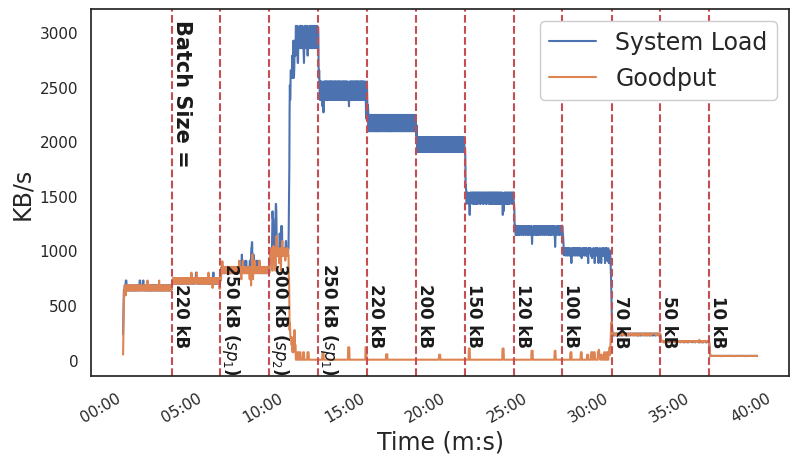

In [15]:
plt.figure(figsize=(9,5.4))
plt.plot(dp["incoming_throughput"] / 1000, label="System Load")
plt.xlabel("Time (m:s)", fontsize="17")
plt.ylabel("KB/s",  fontsize="17")
plt.plot(dp["goodput"] / 1000, label="Goodput")
# plt.plot(dp["batch_size"] * 10/3000, label="Expectation")
plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%M:%S')
plt.gca().xaxis.set_major_formatter(myFmt)

for i in range(len(dp['batch_size'])):
  if i == len(dp['batch_size']) or i == 0:
    continue;
  if dp["batch_size"][i-1] != dp["batch_size"][i]:
    plt.axvline(x = dp.index[i], color = 'r', linestyle="--")
    if (int(dp["batch_size"][i]/1000) == 250):
      plt.text(dp.index[i],-90,f'{int(dp["batch_size"][i]/1000)} kB ($sp_1$)',rotation=-90, color='k', weight='bold')
    elif (int(dp["batch_size"][i]/1000) == 300):
      plt.text(dp.index[i],-90,f'{int(dp["batch_size"][i]/1000)} kB ($sp_2$)',rotation=-90, color='k', weight='bold')
    else:
      plt.text(dp.index[i],150,f'{int(dp["batch_size"][i]/1000)} kB',rotation=-90, color='k', weight='bold')

plt.text(dp.index[179], 1800, "Batch Size =", rotation = -90, color='k', weight='bold', size="15")

plt.legend(frameon=True, framealpha=1, fontsize="17")
plt.savefig('load.pdf', bbox_inches='tight')

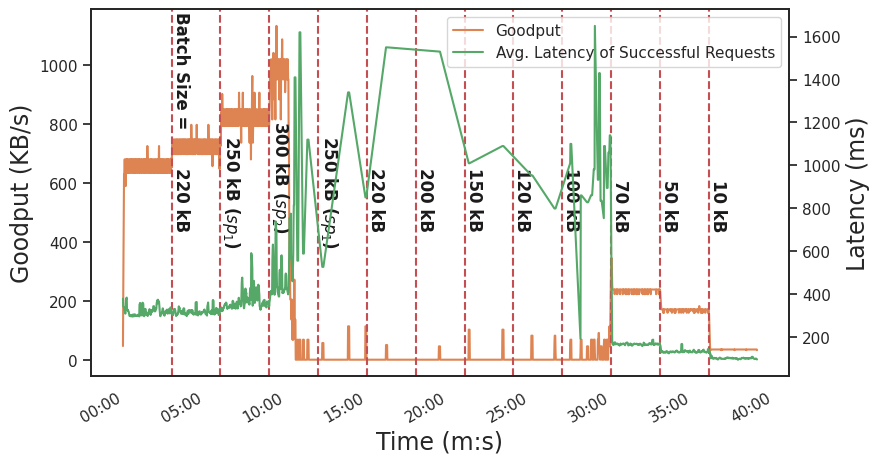

In [16]:

fig,ax = plt.subplots()

fig.set_size_inches(9,5.4)
# ax.plot(dp["incoming_throughput"] / 1000, label="System Load")
ax.set_xlabel("Time (m:s)", fontsize="17")
ax.set_ylabel("Goodput (KB/s)", fontsize="17")
ax.plot(dp["goodput"] / 1000, label="Goodput", color="C1")
fig.autofmt_xdate()
myFmt = mdates.DateFormatter('%M:%S')
ax.xaxis.set_major_formatter(myFmt)

ax2 = ax.twinx()
ax2.plot(dp["average_latency_of_finished_requests"] * 1000, label="Avg. Latency of Successful Requests", color="C2")
# ax2.plot(dp["completed_retries_rate"], label="Avg. Num. of Completed Retries", color="C2")
ax2.grid(False)
ax2.set_ylabel("Latency (ms)", fontsize="17")

for i in range(len(dp['batch_size'])):
  if i == len(dp['batch_size']) or i == 0:
    continue;
  if dp["batch_size"][i-1] != dp["batch_size"][i]:
    ax.axvline(x = dp.index[i], color = 'r', linestyle="--")
    if (int(dp["batch_size"][i]/1000) == 250):
      ax.text(dp.index[i],400,f'{int(dp["batch_size"][i]/1000)} kB ($sp_1$)',rotation=-90, color='k', weight='bold')
    elif (int(dp["batch_size"][i]/1000) == 300):
      ax.text(dp.index[i],450,f'{int(dp["batch_size"][i]/1000)} kB ($sp_2$)',rotation=-90, color='k', weight='bold')
    else:
      ax.text(dp.index[i],450,f'{int(dp["batch_size"][i]/1000)} kB',rotation=-90, color='k', weight='bold')
ax.text(dp.index[179], 800, "Batch Size =", rotation = -90, color='k', weight='bold')
# ax.legend(loc="upper right", frameon=True,fontsize="13")
# ax2.legend(loc='upper right', frameon=True, fontsize="13")

lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2


ax.legend(lines, labels, loc=0)
fig.savefig('latency.pdf', bbox_inches='tight')

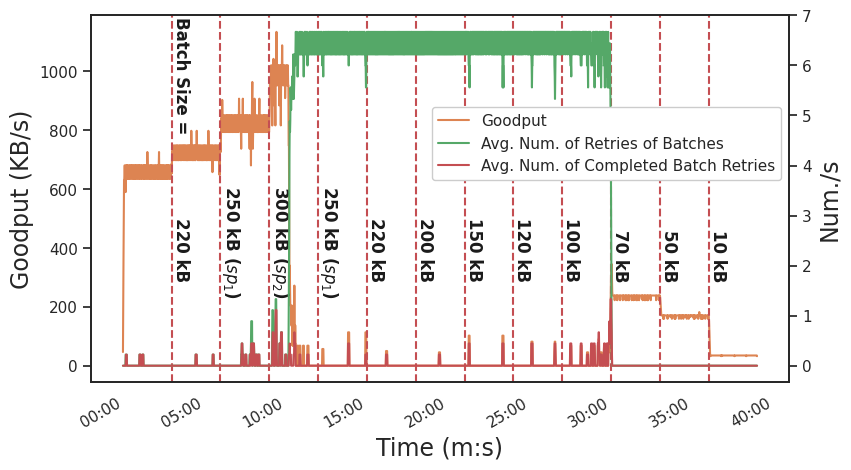

In [17]:
fig,ax = plt.subplots()

fig.set_size_inches(9,5.4)
# ax.plot(dp["incoming_throughput"] / 1000, label="System Load")
ax.set_xlabel("Time (m:s)", fontsize="17")
ax.set_ylabel("Goodput (KB/s)", fontsize="17")
ax.plot(dp["goodput"] / 1000, label="Goodput", color="C1")
fig.autofmt_xdate()
myFmt = mdates.DateFormatter('%M:%S')
ax.xaxis.set_major_formatter(myFmt)

ax2 = ax.twinx()
ax2.plot(dp["total_retries_rate"], label="Avg. Num. of Retries of Batches", color="C2")
ax2.plot(dp["completed_retries_rate"], label="Avg. Num. of Completed Batch Retries", color="C3")
ax2.grid(False)
ax2.set_ylabel("Num./s", fontsize="17")

for i in range(len(dp['batch_size'])):
  if i == len(dp['batch_size']) or i == 0:
    continue;
  if dp["batch_size"][i-1] != dp["batch_size"][i]:
    ax.axvline(x = dp.index[i], color = 'r', linestyle="--")
    if (int(dp["batch_size"][i]/1000) == 250):
      ax.text(dp.index[i],250,f'{int(dp["batch_size"][i]/1000)} kB ($sp_1$)',rotation=-90, color='k', weight='bold')
    elif (int(dp["batch_size"][i]/1000) == 300):
      ax.text(dp.index[i],250,f'{int(dp["batch_size"][i]/1000)} kB ($sp_2$)',rotation=-90, color='k', weight='bold')
    else:
      ax.text(dp.index[i],300,f'{int(dp["batch_size"][i]/1000)} kB',rotation=-90, color='k', weight='bold')
ax.text(dp.index[179], 800, "Batch Size =", rotation = -90, color='k', weight='bold')

lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2


ax2.legend(lines, labels, loc='upper right', bbox_to_anchor=(1, 0.77), framealpha=1)


fig.savefig('retries.pdf', bbox_inches='tight')